**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.axes as ax

**LOADING DATA**

In [ ]:
data = pd.read_csv('lr_data.csv')

In [ ]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [ ]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


x    0
y    1
dtype: int64

**DATA PREPROCESSING**

In [ ]:
data = data.dropna()
print("Shape of the data: ", data.shape)

Shape of the data:  (699, 2)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


**SPLITTING THE DATA**

In [ ]:
#training input and output
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

#validation input and output
test_input = np.array(data.x[500:699]).reshape(199,1)
test_output = np.array(data.y[500:699]).reshape(199,1)

In [ ]:
print(f"Training input data shape: {train_input.shape}")
print(f"Training output data shape: {train_output.shape}")
print(f"Testing input data shape: {test_input.shape}")
print(f"Testing output data shape: {test_output.shape}")

Training input data shape: (500, 1)
Training output data shape: (500, 1)
Testing input data shape: (199, 1)
Testing output data shape: (199, 1)


# <font color = "yellow"><b>REGRESSION MODEL</font>

### **FORWARD PROPAGATION**
  **f(x) = m*x + c**

In [ ]:
def forward_propagation(train_input, parameters):
  m = parameters["m"]
  c = parameters["c"]

  prediction = np.multiply(m, train_input) + c

  return prediction

### **COST FUNCTION**
  **summation(1/2n * (y - f(x))^2)**

In [ ]:
def cost_function(prediction, train_output):

  cost = np.mean((train_output - prediction) ** 2 * 0.5)

  return cost

### **GRADIENT DESCENT FOR BACK PROPAGATION**
  **df = (f(x) - y)/n<br>dm = df * x <br>dc = df * 1**

In [ ]:
def backward_propagation(train_input, train_output, prediction):
  derivatives = dict()

  df = prediction - train_output
  dm = np.mean(np.multiply(df, train_input))
  dc = np.mean(df)

  derivatives['dm'] = dm
  derivatives['dc'] = dc

  return derivatives

### **UPDATE PARAMETERS**
  **m' = m - (learning_rate * dm) <br><br> c' = c - (learning_rate * dc)**

In [ ]:
def update_parameters(parameters, derivatives, learning_rate):
  parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
  parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']

  return parameters

### **MODEL TRAINING**

In [ ]:
def train(train_input, train_output, learning_rate, iters):

  # Random parameters
  parameters = dict()
  parameters['m'] = np.random.uniform(0,1) * -1
  parameters['c'] = np.random.uniform(0,1) * -1

  plt.figure()

  # loss
  loss = list()

  # iterations
  for i in range(iters):

    # forward propagation
    prediction = forward_propagation(train_input, parameters)

    # cost
    cost = cost_function(prediction, train_output)

    loss.append(cost)
    print(f"Iteration = {i+1}, Loss = {cost}")

    # plot
    fig, ax = plt.subplots()
    ax.plot(train_input, train_output, "+", label = 'Original')
    ax.plot(train_input, prediction, "*", label = 'Training')

    legend = ax.legend()
    plt.plot(train_input, train_output, "+", label = 'Original')
    plt.plot(train_input, prediction, "*", label = 'Training')
    plt.show()

    #  Backward Propagation
    derivatives = backward_propagation(train_input, train_output, prediction)

    #  Update Parameters
    parameters = update_parameters(parameters, derivatives, learning_rate)

  return parameters, loss

### **TRAINING**

Iteration = 1, Loss = 5471.403174218541


<Figure size 640x480 with 0 Axes>

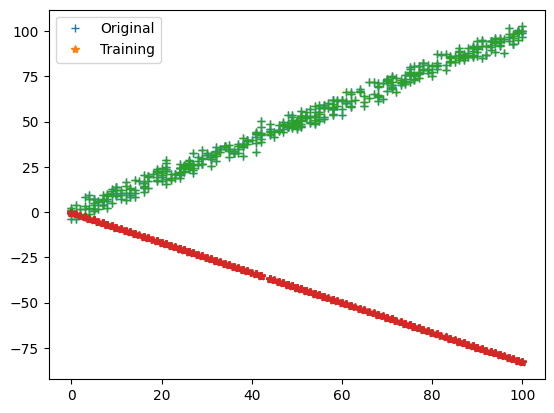

Iteration = 2, Loss = 2484.519520705165


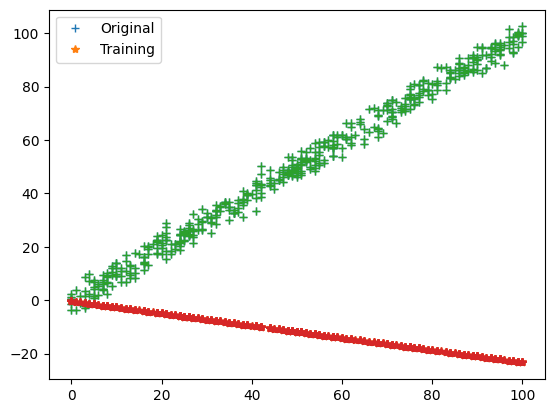

Iteration = 3, Loss = 1129.367098629372


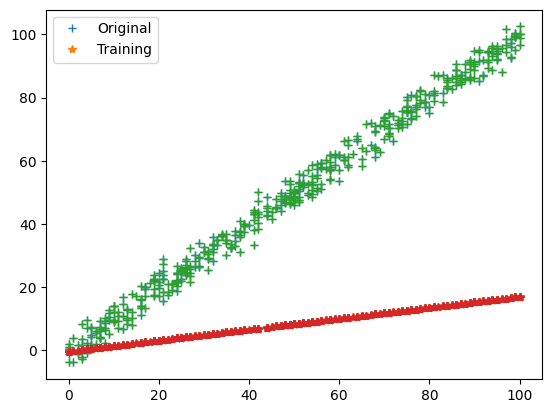

Iteration = 4, Loss = 514.5329436295767


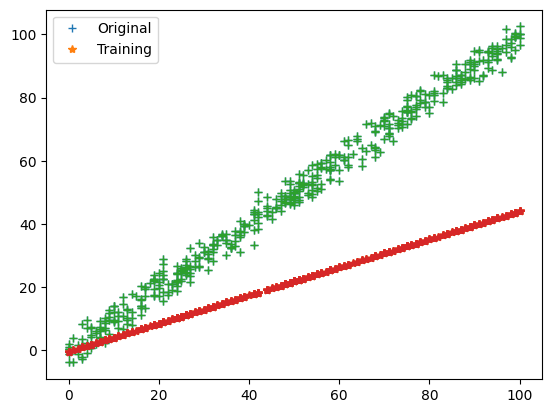

Iteration = 5, Loss = 235.58200640918963


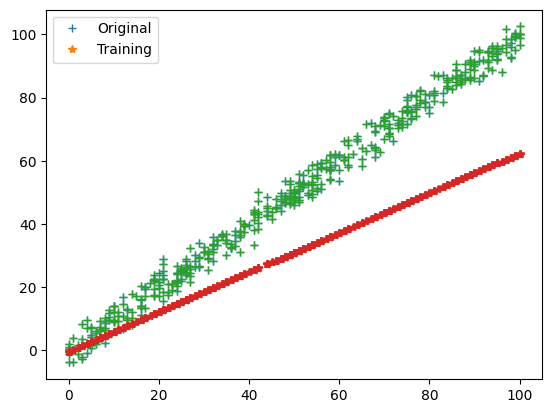

Iteration = 6, Loss = 109.02165713341942


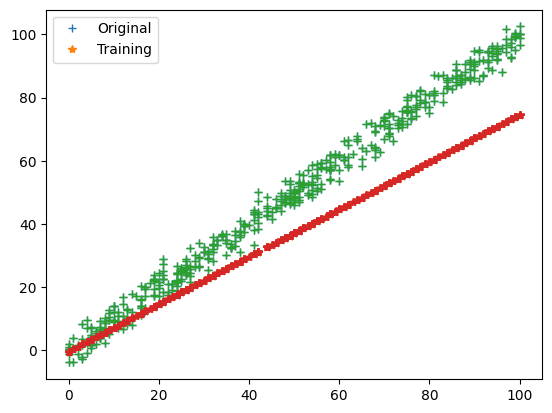

Iteration = 7, Loss = 51.601086402221874


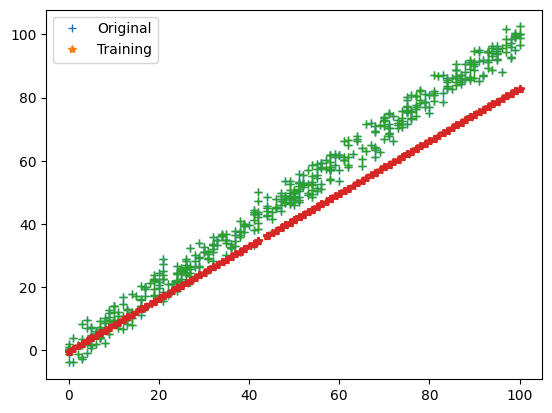

Iteration = 8, Loss = 25.549309778769143


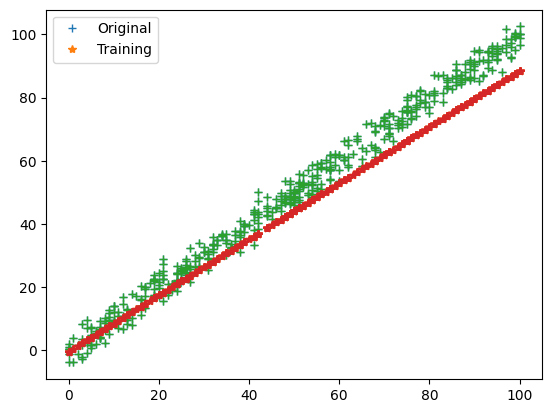

Iteration = 9, Loss = 13.729589787373643


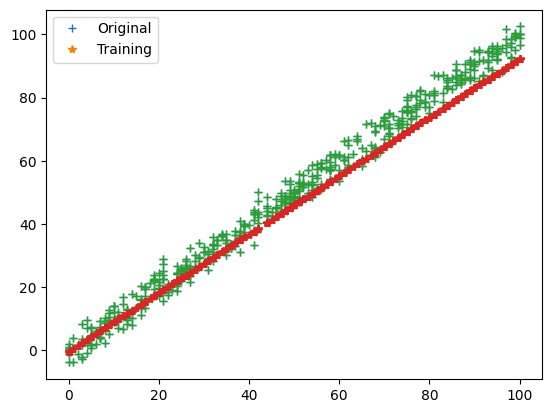

Iteration = 10, Loss = 8.366969653959044


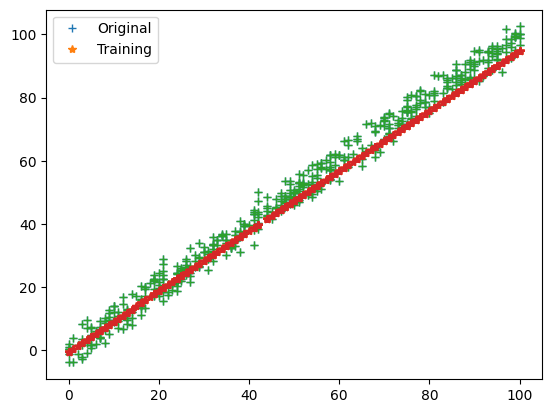

Iteration = 11, Loss = 5.933942878264392


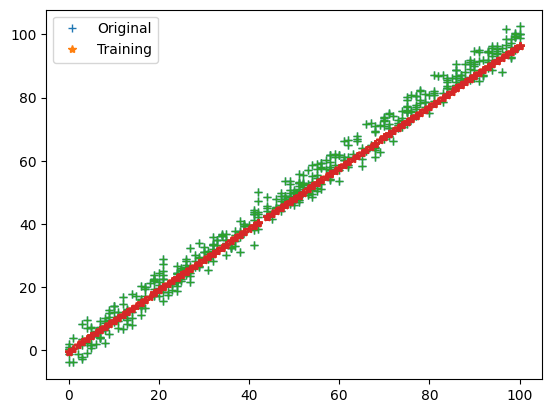

Iteration = 12, Loss = 4.830075853909742


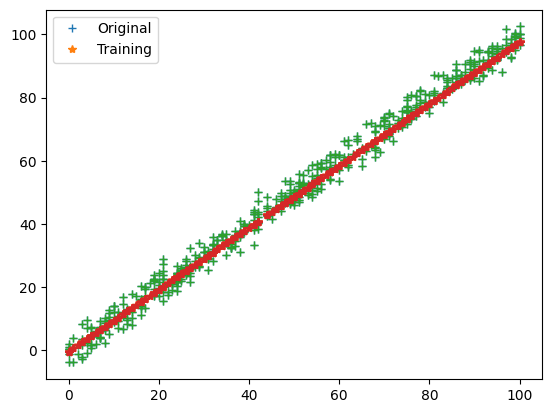

Iteration = 13, Loss = 4.329250080974264


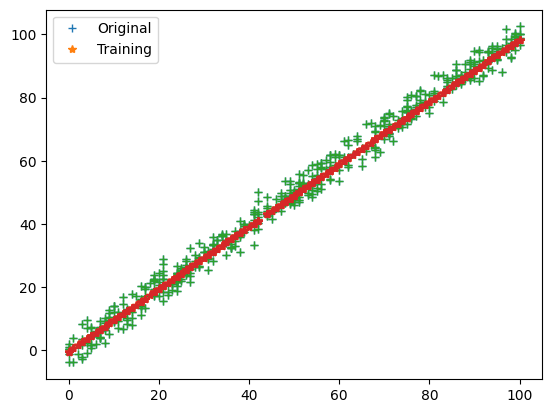

Iteration = 14, Loss = 4.102024791765101


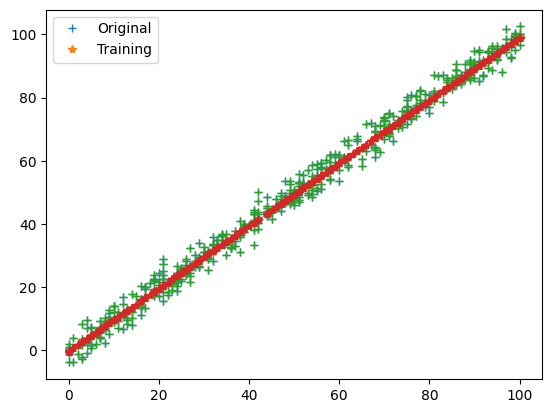

Iteration = 15, Loss = 3.9989323450778267


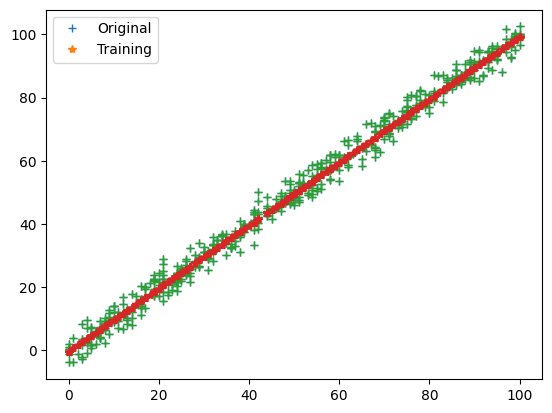

Iteration = 16, Loss = 3.9521591065414863


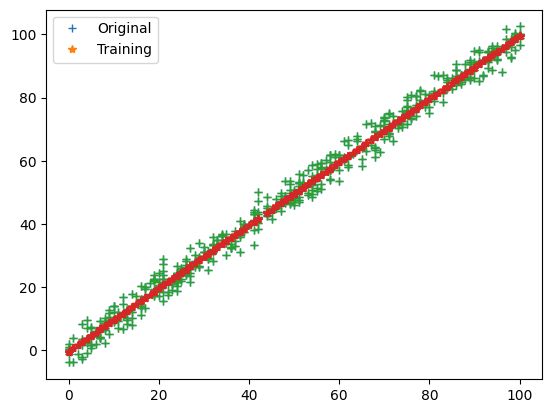

Iteration = 17, Loss = 3.9309379551287957


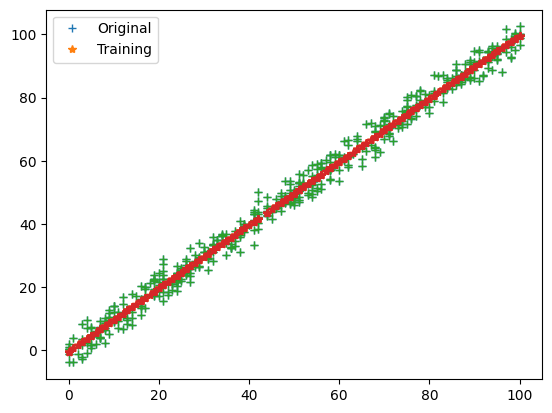

Iteration = 18, Loss = 3.9213098139507414


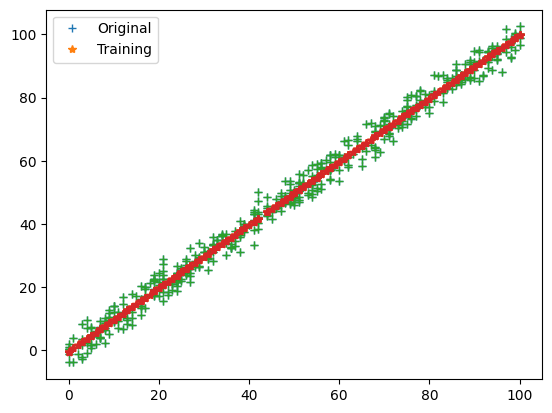

Iteration = 19, Loss = 3.9169414343611333


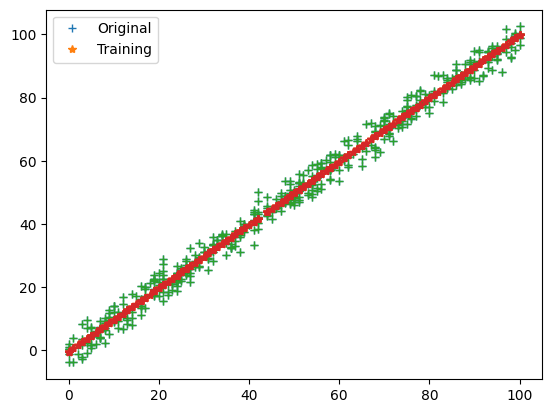

Iteration = 20, Loss = 3.9149594144342252


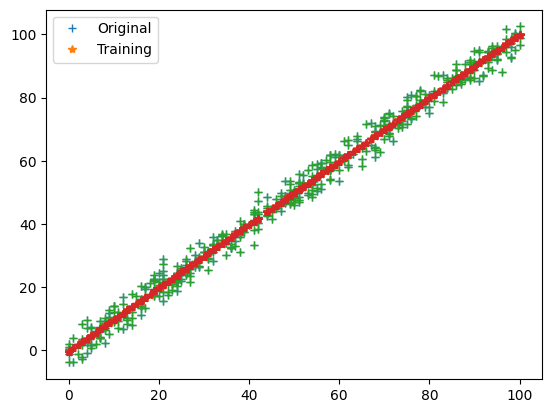

In [ ]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [ ]:
print(parameters)

{'m': 1.0026412728453942, 'c': -0.38915717174939823}


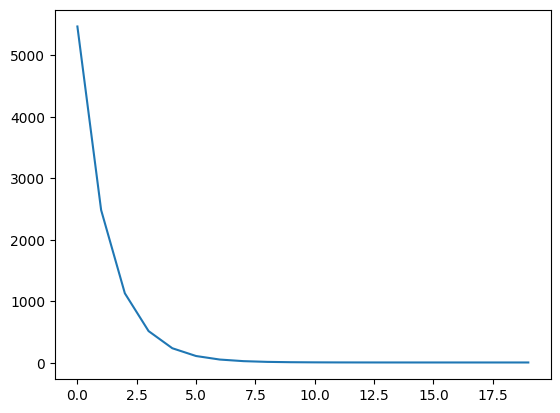

In [ ]:
plt.plot(loss)

### **PREDICTIONS**

In [ ]:
test_predictions = test_input * parameters['m'] + parameters['c']

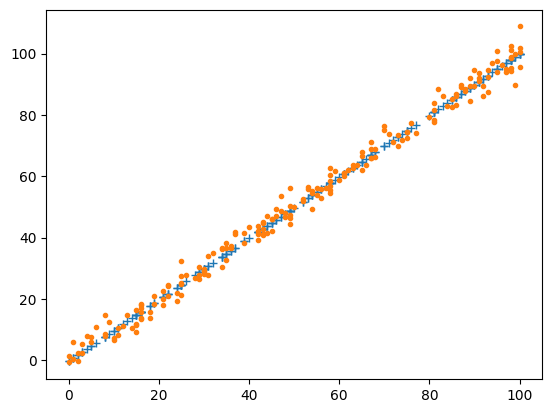

In [ ]:
plt.plot(test_input, test_predictions, '+')
plt.plot(test_input, test_output, '.')
plt.show()